# 의사결정나무_분류

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
import graphviz

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [60]:
df_raw = pd.read_csv("/home/piai/test/Practice/data/유방암.csv", engine="python",encoding="EUC-KR")
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


: 총 31개의 column이 있는 것을 확인할 수 있다.

In [61]:
df_raw.isnull().sum(axis = 0)

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

: 결측치가 하나도 없다.

## 의사결정나무

In [62]:
import os

os.environ["PATH"] += os.pathsep + "/home/piai/anaconda3/lib/python3.8/site-packages/"

In [63]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   mean radius              569 non-null    float64
 2   mean texture             569 non-null    float64
 3   mean perimeter           569 non-null    float64
 4   mean area                569 non-null    float64
 5   mean smoothness          569 non-null    float64
 6   mean compactness         569 non-null    float64
 7   mean concavity           569 non-null    float64
 8   mean concave points      569 non-null    float64
 9   mean symmetry            569 non-null    float64
 10  mean fractal dimension   569 non-null    float64
 11  radius error             569 non-null    float64
 12  texture error            569 non-null    float64
 13  perimeter error          569 non-null    float64
 14  area error               5

:범주형 데이터가 없으므로, 더미변수를 새롭게 추가할 필요 없음을 확인할 수 있다.

In [64]:
df_raw_y = df_raw["diagnosis"]
df_raw_x = df_raw.drop("diagnosis", axis=1, inplace=False)

:설명변수와 목표변수를 분리한다.

In [65]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state= 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (398, 30)
train data Y size : (398,)
test data X size : (171, 30)
test data Y size : (171,)


: df_test_x, df_test_y(test data)를 떼어낸다.

In [66]:
df_train_x, df_valid_x, df_train_y, df_valid_y = train_test_split(df_train_x, df_train_y, test_size = 3/7, random_state= 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("validation data X size : {}".format(df_valid_x.shape))
print("validation data Y size : {}".format(df_valid_y.shape))

train data X size : (227, 30)
train data Y size : (227,)
validation data X size : (171, 30)
validation data Y size : (171,)


: df_train_x, df_train_y(training data), df_valid_x, df_valid_y(validation data)로 분리한다.

In [67]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 0.895


In [68]:
tree_uncustomized

DecisionTreeClassifier(random_state=1234)

In [69]:
# max_depth 수정

train_accuracy = []
valid_accuracy = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(random_state=1234, max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    valid_accuracy.append(tree.score(df_valid_x, df_valid_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = valid_accuracy

In [70]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.943,0.912
1,2,0.982,0.942
2,3,0.982,0.942
3,4,0.996,0.936
4,5,1.000,0.936
5,6,1.000,0.936
6,7,1.000,0.936
7,8,1.000,0.936
8,9,1.000,0.936
9,10,1.000,0.936


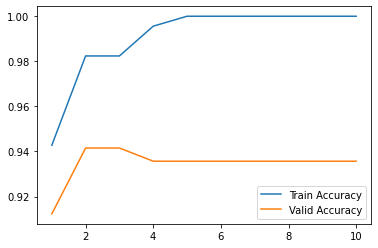

In [71]:
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, valid_accuracy, linestyle="-", label="Valid Accuracy")
plt.legend()

:그래프를 보고, test Accuracy가 가장 높고, Train Accuracy와의 차이가 가장 적은 점인 곳을 선정하여 max_depth는 4로 선정한다.

In [72]:
v_feature_name = df_train_x.columns

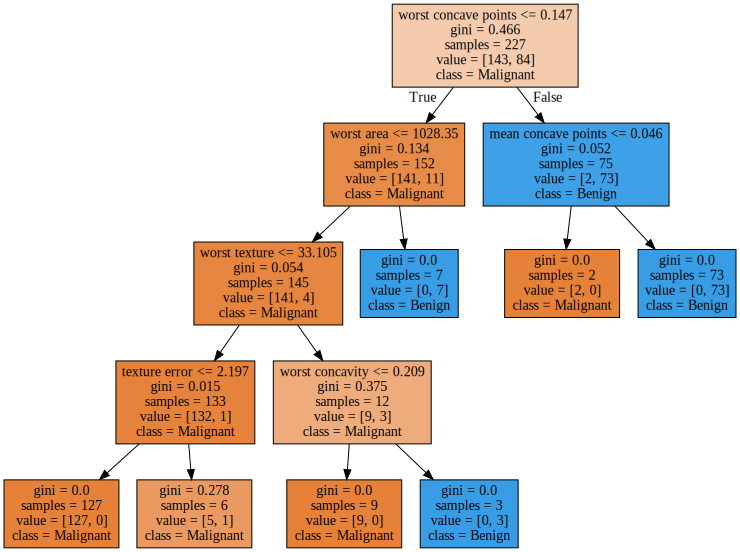

In [73]:
tree_low = DecisionTreeClassifier(random_state=1234, max_depth=4)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file="tree_low.dot", class_names = ["Malignant", "Benign"], feature_names=v_feature_name, impurity=True, filled=True)
with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [74]:
# min_samples_split 수정

train_accuracy = []
valid_accuracy = []

para_split = [split * 10 for split in range(1,11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state=1234, max_depth = 4, min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    valid_accuracy.append(tree.score(df_valid_x, df_valid_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["ValidAccuracy"] = valid_accuracy

In [75]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,ValidAccuracy
0,10,0.996,0.936
1,20,0.982,0.942
2,30,0.982,0.942
3,40,0.982,0.942
4,50,0.982,0.942
5,60,0.982,0.942
6,70,0.982,0.942
7,80,0.974,0.936
8,90,0.974,0.936
9,100,0.974,0.936


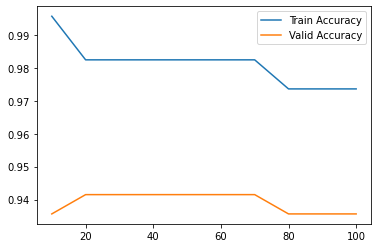

In [76]:
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_split, valid_accuracy, linestyle="-", label="Valid Accuracy")
plt.legend()

: min_samples_split을 40으로 설정한다.

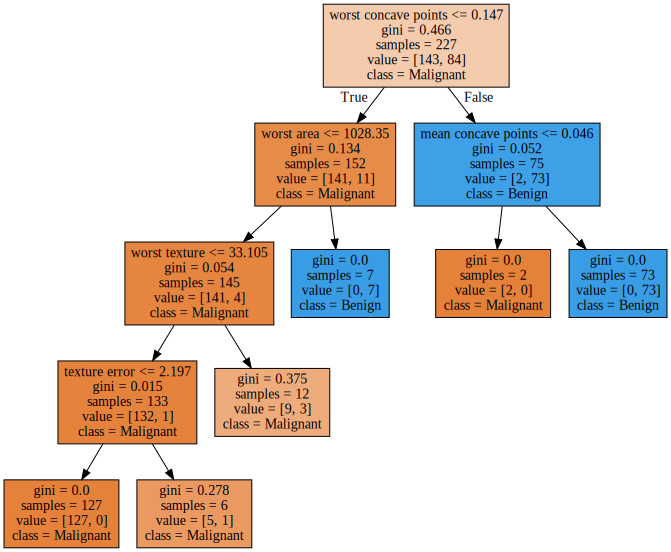

In [77]:
tree_low = DecisionTreeClassifier(random_state=1234, max_depth=4, min_samples_split=40)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file="tree_low.dot", class_names = ["Malignant", "Benign"], feature_names=v_feature_name, impurity=True, filled=True)
with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [78]:
# min_samples_leaf 수정

train_accuracy = []
valid_accuracy = []

para_leaf = [leaf * 2 for leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state=1234, max_depth = 4, min_samples_split=40, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    valid_accuracy.append(tree.score(df_valid_x, df_valid_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesSplit"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["ValidAccuracy"] = valid_accuracy

In [79]:
df_accuracy_leaf.round(3)

,MinSamplesSplit,TrainAccuracy,ValidAccuracy
0,2,0.982,0.942
1,4,0.974,0.942
2,6,0.974,0.936
3,8,0.969,0.930
4,10,0.969,0.930
5,12,0.960,0.936
6,14,0.952,0.924
7,16,0.943,0.912
8,18,0.943,0.912
9,20,0.943,0.912


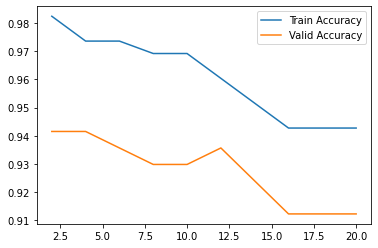

In [80]:
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_leaf, valid_accuracy, linestyle="-", label="Valid Accuracy")
plt.legend()

: min_samples_leaf를 4로 설정한다.

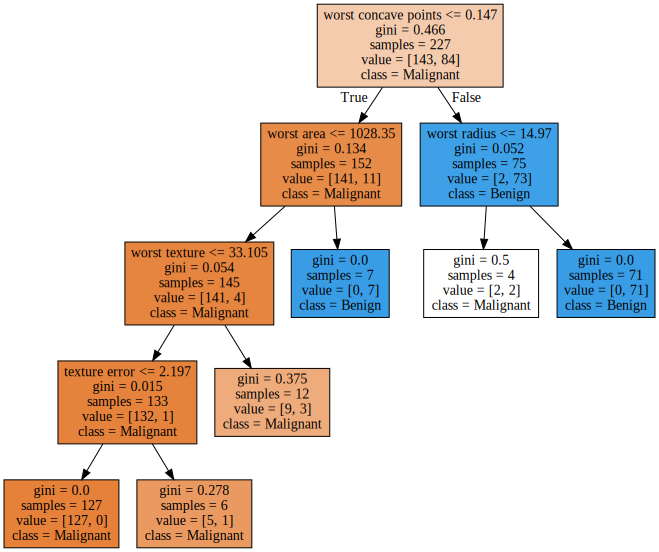

In [81]:
tree_low = DecisionTreeClassifier(random_state=1234, max_depth=4, min_samples_split=40, min_samples_leaf=4)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file="tree_low.dot", class_names = ["Malignant", "Benign"], feature_names=v_feature_name, impurity=True, filled=True)
with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [82]:
tree_final = DecisionTreeClassifier(random_state=1234, min_samples_leaf=4, min_samples_split=40, max_depth=4)
tree_final.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(tree_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(tree_final.score(df_test_x, df_test_y)))

Score on training set: 0.974
Score on test set: 0.906


In [83]:
y_pred = tree_final.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.906

Confusion matrix: 
[[103   2]
 [ 14  52]]


# 랜덤포레스트_분류

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Score on validation set: {:.3f}".format(rf_uncustomized.score(df_valid_x, df_valid_y)))

Score on training set: 1.000
Score on validation set: 0.953


In [89]:
# n_estimators 찾기
train_accuracy = []
valid_accuracy = []

para_n_tree = [n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators=v_n_estimators, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    valid_accuracy.append(rf.score(df_valid_x, df_valid_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = valid_accuracy

In [90]:
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.996,0.953
1,20,0.996,0.953
2,30,1.000,0.953
3,40,1.000,0.953
4,50,1.000,0.947
5,60,1.000,0.953
6,70,1.000,0.953
7,80,1.000,0.953
8,90,1.000,0.953
9,100,1.000,0.953


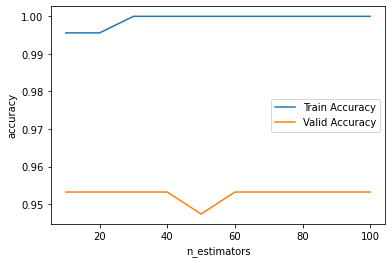

In [91]:
plt.plot(para_n_tree, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_tree, valid_accuracy, linestyle="-", label="Valid Accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_estimators")
plt.legend()

In [92]:
oob_error = []

for v_n_estimator in range(1,151):
    rf = RandomForestClassifier(n_estimators = v_n_estimator, oob_score = True, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1 - rf.oob_score_)

/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This prob

Text(0.5, 0, 'n_estimators')

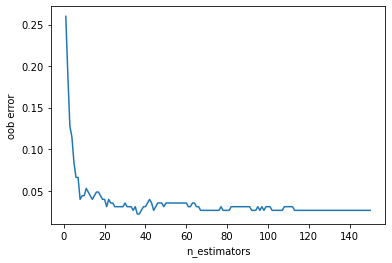

In [93]:
plt.plot(range(1,151), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

In [94]:
n_estimators = 100

: n_estimators는 100으로 선정한다.

In [98]:
train_accuracy = []
valid_accuracy = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(n_estimators=100, max_depth=v_max_depth, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    valid_accuracy.append(rf.score(df_valid_x, df_valid_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainAccuracy"] = train_accuracy
df_score_depth["ValidAccuracy"] = valid_accuracy

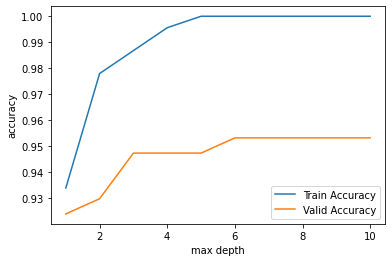

In [99]:
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, valid_accuracy, linestyle="-", label="Valid Accuracy")
plt.ylabel("accuracy")
plt.xlabel("max depth")
plt.legend()

max_depth = 4

:max depth를 4로 선정한다.

In [100]:
train_accuracy = []
valid_accuracy = []

para_split = [n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(n_estimators=100, min_samples_split=v_min_samples_split, max_depth = 4, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    valid_accuracy.append(rf.score(df_valid_x, df_valid_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["ValidAccuracy"] = valid_accuracy

In [101]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,ValidAccuracy
0,10,0.987,0.947
1,20,0.987,0.947
2,30,0.987,0.947
3,40,0.987,0.947
4,50,0.987,0.942
5,60,0.982,0.942
6,70,0.978,0.942
7,80,0.978,0.942
8,90,0.978,0.942
9,100,0.974,0.936


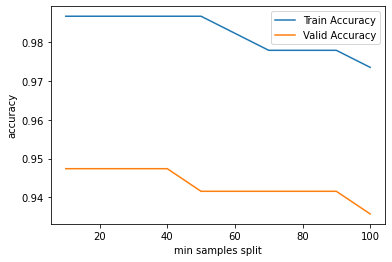

In [102]:
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_split, valid_accuracy, linestyle="-", label="Valid Accuracy")
plt.ylabel("accuracy")
plt.xlabel("min samples split")
plt.legend()

: min samples split을 40으로 선정한다.

In [108]:
train_accuracy = []
valid_accuracy = []

para_leaf = [n_leaf*10 for n_leaf in range(1,11)]

for v_min_leaf in para_leaf:
    rf = RandomForestClassifier(n_estimators=100, max_depth = 4, min_samples_split = 40, min_samples_leaf=v_min_leaf, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    valid_accuracy.append(rf.score(df_valid_x, df_valid_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["n_leaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["ValidAccuracy"] = valid_accuracy

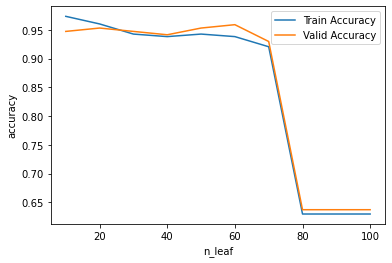

In [109]:
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_leaf, valid_accuracy, linestyle="-", label="Valid Accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_leaf")
plt.legend()

: n_leaf를 40으로 선정한다.

In [110]:
rf_final = RandomForestClassifier(random_state=1234, n_estimators=100, min_samples_split = 40, min_samples_leaf = 40, max_depth=4)
rf_final.fit(df_train_x, df_train_y)

RandomForestClassifier(max_depth=4, min_samples_leaf=40, min_samples_split=40,
                       random_state=1234)

In [111]:
y_pred = rf_final.predict(df_test_x)

print("Accuracy on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.938
Accuracy on test set: 0.912
Confusion matrix: 
[[103   2]
 [ 13  53]]


: test data로 테스트한 결과, 91.2%의 설명력을 가지고, 다음과 같은 confusion matrix를 가지는 것을 확인할 수 있었다.